### A Very Brief Overview of Li, et al (2024)

Lu, et al (2024) use a large language model (LLM) to discover objective functions $f$.

Their paper is available at: https://arxiv.org/pdf/2406.08414

They use Direct Preference Optimization (DPO) as a baseline and discover a number of new objective functions. They discover Log Ratio Modulated Loss (LRML) a.k.a DiscoPOP. They find that LRML compares favourable to DPO and other baseline $f$.

Table 2 on page 6 covers the win rate of various $f$ on the Alpaca Eval 2.0. They compare how often models trained with DPO or LRML are preffered to GPT-4. They do not specify the revision of GPT-4. This is regretable as GPT-4 performance on MMLU and similar scores differs considerably versions.

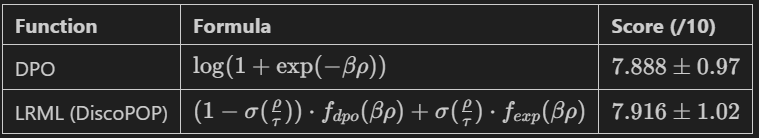

### Significance Testing

We perform a non-parametric Mann-Whitney U test to assess the significance of the difference between the DPO and LRML models. We select a non-parametric test in line with Demsar (2006).

We then find the Cohen's $d$ to estimate effect size.

$$
d = \frac{M_1-M_2}{\sigma}
$$

where $M_1$ and $M_2$ are the means of the two groups and $\sigma$ is the pooled standard deviation (SD).

In [3]:
import numpy as np
from scipy import stats

def compare_performances(mean1, sem1, mean2, sem2):
    # Calculate the z-score
    z_score = (mean1 - mean2) / np.sqrt(sem1**2 + sem2**2)

    # Calculate the two-tailed p-value
    p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))

    # Calculate Cohen's d effect size
    # Using pooled standard deviation estimate
    pooled_sd = np.sqrt((sem1**2 + sem2**2) / 2)
    cohens_d = (mean1 - mean2) / pooled_sd

    return z_score, p_value, cohens_d

# Example usage (replace with your actual values):
dpo_mean, dpo_sem = 78.72, 1.26
lrml_mean, lrml_sem = 79.27, 1.24

z_score, p_value, cohens_d = compare_performances(dpo_mean, dpo_sem, lrml_mean, lrml_sem)

print(f"Z-score: {z_score}")
print(f"P-value: {p_value}")
print(f"Effect size (Cohen's d): {cohens_d}")

# Interpret the results
alpha = 0.05  # Typical significance level
if p_value < alpha:
    print(f"\nThe difference in performance is statistically significant (p < {alpha}).")
else:
    print(f"\nThe difference in performance is not statistically significant (p >= {alpha}).")

print("\nEffect size interpretation:")
if abs(cohens_d) < 0.2:
    print("The effect size is very small.")
elif abs(cohens_d) < 0.5:
    print("The effect size is small.")
elif abs(cohens_d) < 0.8:
    print("The effect size is medium.")
else:
    print("The effect size is large.")

Z-score: -0.31111702813646575
P-value: 0.7557116565153483
Effect size (Cohen's d): -0.4399859206758016

The difference in performance is not statistically significant (p >= 0.05).

Effect size interpretation:
The effect size is small.


### Conclusion

It is also worth noting that Li, et al in fact discover seven distinct loss functions, most of which are inferior to the baseline DPO. This practice further increases the chance they find an apparently superior objective function.

In my opinion, Li et al. should have employed a non-parametric Friedman test, followed by a post-hoc Conover-Friedman test with Holm-Bonferroni adjustments. This approach would have allowed them to confirm the non-significance of their results while appropriately adjusting for multiple comparisons, thereby reducing the risk of inadvertent p-hacking.

### Bibliography

Statistical comparisons of classifiers over multiple data sets

J. Demsar

Journal of machine learning research 2006 Vol. 7 Pages 1-30




While methods for comparing two learning algorithms on a single data set have been scrutinized for quite some time already, the issue of statistical tests for comparisons of more algorithms on multiple data sets, which is even more essential to typical machine learning studies, has been all but ignored. This article reviews the current practice and then theoretically and empirically examines several suitable tests. Based on that, we recommend a set of simple, yet safe and robust non-parametric tests for statistical comparisons of classifiers: the Wilcoxon signed ranks test for comparison of two classifiers and the Friedman test with the corresponding post-hoc tests for comparison of more classifiers over multiple data sets. Results of the latter can also be neatly presented with the newly introduced CD ( critical difference) diagrams.
